In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px

df = pd.read_csv("../../isaFull.tsv", '\t')

In [2]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

In [3]:
##remove empty days and transform visit date to date time data type
df=df.dropna(subset=['Visit date [EUPATH_0000091]'])
df['Visit date [EUPATH_0000091]'] = pd.to_datetime(df['Visit date [EUPATH_0000091]'])

import datetime as dt
## Create visit week column containing date on MONDAY of the week the visit took place in: -------------
df['visit_week'] = df['Visit date [EUPATH_0000091]'].apply(lambda d: d-dt.timedelta(days=d.weekday()))
df['yyyy_mm'] = df['Visit date [EUPATH_0000091]'].dt.strftime('%Y-%m')

# Number of visits per month

In [4]:
table_freq=pd.value_counts(df['yyyy_mm']).to_frame().reset_index()
table_freq = table_freq.set_index("index").sort_index()
table_freq

,yyyy_mm
index,
2011-07,6
2011-08,679
2011-09,894
2011-10,541
2011-11,1011
...,...
2017-03,329
2017-04,347
2017-05,368


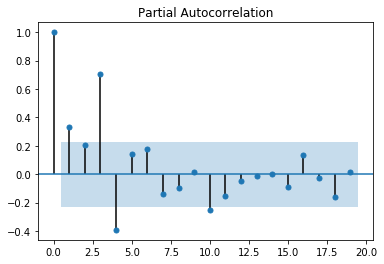

In [5]:
#https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
#not really sure what Partial Autocorrelation is
plot_pacf(table_freq['yyyy_mm'])
pyplot.show()

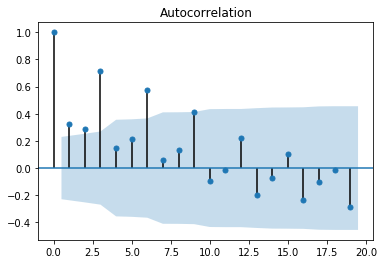

In [6]:
plot_acf(table_freq['yyyy_mm'])
pyplot.show()

# Number of visits per week

In [7]:
table_freq2=pd.value_counts(df['visit_week']).to_frame().reset_index()
table_freq2 = table_freq2.set_index("index").sort_index()
table_freq2

,visit_week
index,
2011-07-25,6
2011-08-01,51
2011-08-08,96
2011-08-15,175
2011-08-22,230
...,...
2017-06-05,71
2017-06-12,91
2017-06-19,81


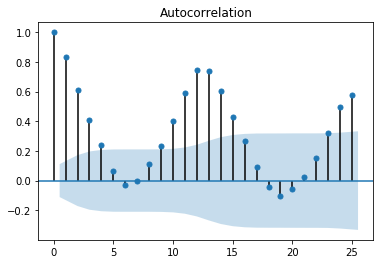

In [8]:
plot_acf(table_freq2['visit_week'])
pyplot.show()

# Number of positive malaria diagnosis per week

In [9]:
malaria_df=df[df['Malaria diagnosis [EUPATH_0000090]']=="Yes"]
table_freq3=pd.value_counts(malaria_df['visit_week']).to_frame().reset_index()
table_freq3=table_freq3.set_index("index").sort_index()
table_freq3
#note: Not all the weeks are represented here (i.e there were weeks where there were no positive diagnosis - need to impute missing weeks with count=0)

,visit_week
index,
2011-08-08,1
2011-08-15,6
2011-08-22,11
2011-08-29,17
2011-09-05,18
...,...
2017-06-05,2
2017-06-12,6
2017-06-19,5


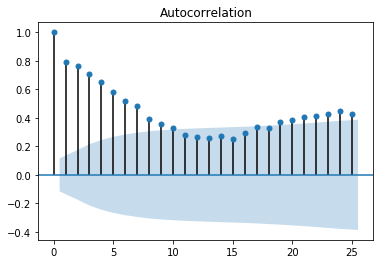

In [10]:
plot_acf(table_freq3['visit_week'])
pyplot.show()

In [79]:
print(df['visit_week'].min(),df['visit_week'].max())

2011-07-25 00:00:00 2017-07-03 00:00:00


In [105]:
##imputing no visits in a week
#make a separate dataframe with start week to finish week with 0 for frequency 
weeks_df=pd.date_range(start=df['visit_week'].min(),end=df['visit_week'].max(),freq='W-MON')
weeks_df=pd.DataFrame(weeks_df)
weeks_df['zero']=0
weeks_df.columns=['week','zero']
weeks_df=weeks_df.set_index('week')
weeks_df

,zero
week,
2011-07-25,0
2011-08-01,0
2011-08-08,0
2011-08-15,0
2011-08-22,0
...,...
2017-06-05,0
2017-06-12,0
2017-06-19,0


In [ ]:
#loop through the week collapsed data seeing if there is that week in the all_weeks dataframe, if yes skip, if no append.

for index in table_freq2.iterrows:
    if index in df_week.loc[]:
        skip
    else:
        append df_week to table_freq2

In [30]:
#alternatives to the plot so can transfer the data to d3? Get a table with time lag and autocorrelation?
#.autocorr()

In [33]:
fig=px.histogram(df,x='yyyy_mm')
fig.show()